<a href="https://colab.research.google.com/github/akundu3387/Wine-Classifiation/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project By: Arjun Kundu and Milan Parmar

Slides: Equal contribution from both of us.
Code:


*   Arjun


> Worked on code setup, finished data input and sorting.

*   Milan


> Worked on data visualization and classifiers.


Code Explanation: Equal contribution from both of us.

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read the data file
wine = pd.read_csv('/content/winequality-red.csv')    # imports file from Google Colab library (need to upload in file tab beforehand)

Data Analysis

In [ ]:
# See the first five rows of the dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Check for missing values
print(wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


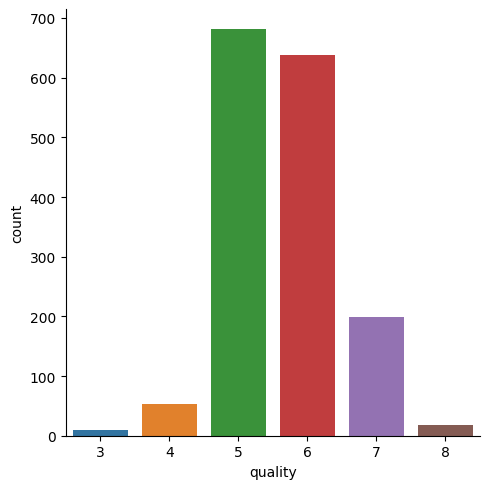

In [ ]:
# number of values for each quality
sns.catplot(x='quality', data = wine, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

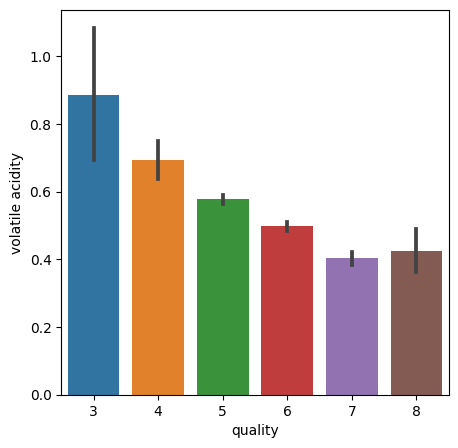

In [ ]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<Axes: xlabel='quality', ylabel='alcohol'>

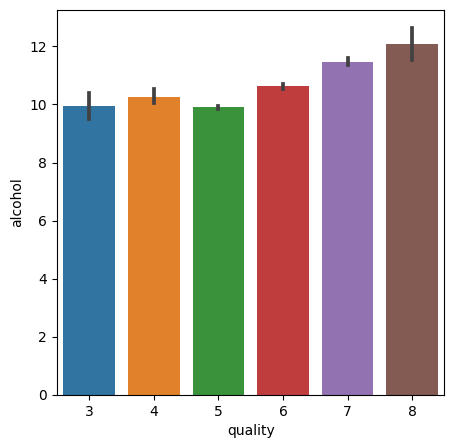

In [ ]:
# alcohol percentage vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

<Axes: >

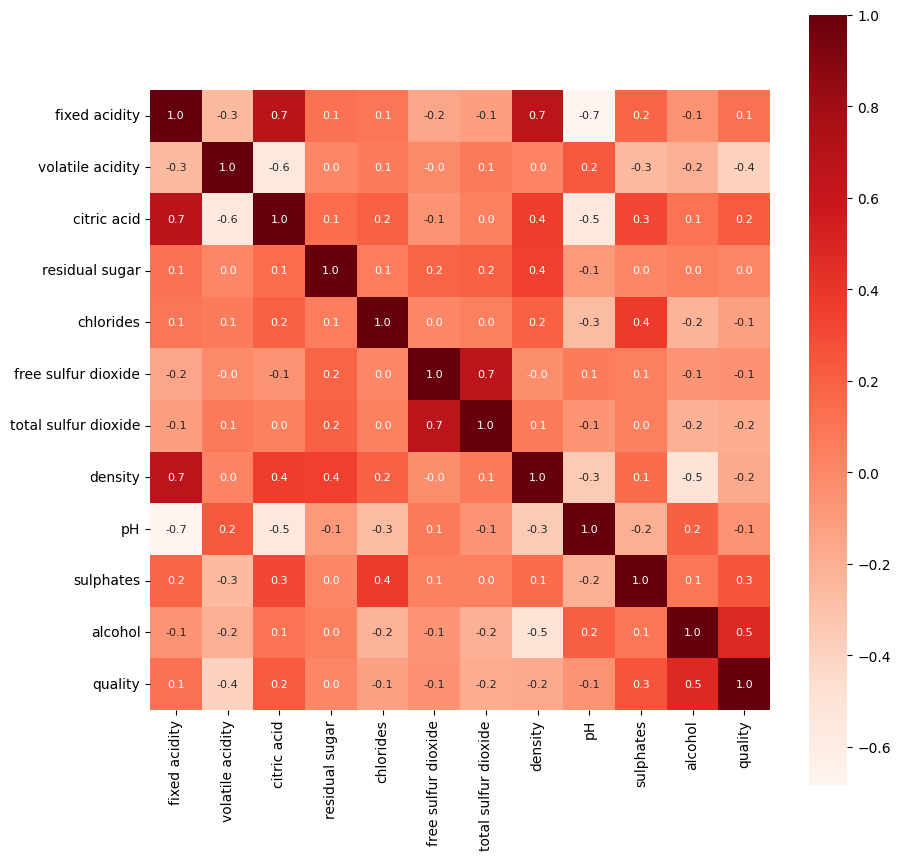

In [ ]:
correlation = wine.corr()

# heatmap construction
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot=True, annot_kws={'size':8}, cmap="Reds")

Data Preparation

In [ ]:
X = wine.drop('quality', axis=1)
y = wine['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0) # if quality >= 7, considered peak, if not, poor

print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()  # call LinearRegression class
reg.fit(X_train, y_train) # perform regression algorithm

print("Linear regression has accuracy of: ", reg.score(X_test, y_test))
print("Weights: ", reg.coef_)
print("Bias: ", reg.intercept_)

Linear regression has accuracy of:  0.24666522898684984
Weights:  [ 3.82599382e-02 -1.72451012e-01  1.21607472e-01  3.11841975e-02
 -6.75218942e-01 -2.82438201e-04 -8.31753076e-04 -3.92475224e+01
  8.06682245e-02  3.32728860e-01  7.02569385e-02]
Bias:  37.8034611432972


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_reg = LogisticRegression()  # call LogisticRegression class
log_reg.fit(X_train, y_train)   # perform algorithm

training_pred = log_reg.predict(X_train)  # training predictions
test_pred = log_reg.predict(X_test)       # test predictions
log_reg_weights = log_reg.coef_

print("\n\nLogistic Regression Model\n")
print("Logistic regression has accuracy of: ", log_reg.score(X_test, y_test))
print("Weights: ", log_reg_weights)
print("Bias: \n", log_reg.intercept_)
print("\nPrecision, Recall, Confusion Matrix, In-Training\n")

# Precision Recall Scores
print(metrics.classification_report(y_train, training_pred, digits=3))

# Confusion Matrix
print(metrics.confusion_matrix(y_train, training_pred))

print("\nPrecision, Recall, Confusion Matrix, In-Testing\n")

# Precision Recall Scores
print(metrics.classification_report(y_test, test_pred, digits=3))

# Confusion Matrix
print(metrics.confusion_matrix(y_test, test_pred))



Logistic Regression Model

Logistic regression has accuracy of:  0.903125
Weights:  [[-0.02156077 -2.84550084  0.03079697  0.11003986 -1.54769821  0.01937214
  -0.0186238  -1.36903285 -2.17154586  2.01494187  0.88489152]]
Bias: 
 [-2.41383229]

Precision, Recall, Confusion Matrix, In-Training

              precision    recall  f1-score   support

           0      0.891     0.975     0.931      1099
           1      0.645     0.272     0.383       180

    accuracy                          0.876      1279
   macro avg      0.768     0.624     0.657      1279
weighted avg      0.856     0.876     0.854      1279

[[1072   27]
 [ 131   49]]

Precision, Recall, Confusion Matrix, In-Testing

              precision    recall  f1-score   support

           0      0.914     0.982     0.947       283
           1      0.688     0.297     0.415        37

    accuracy                          0.903       320
   macro avg      0.801     0.640     0.681       320
weighted avg      0.888    

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("Random Forest Classifier has accuracy of: ", rfc.score(X_test, y_test))
print(classification_report(y_test, y_pred_rfc))

Random Forest Classifier has accuracy of:  0.928125
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       283
           1       0.77      0.54      0.63        37

    accuracy                           0.93       320
   macro avg       0.86      0.76      0.80       320
weighted avg       0.92      0.93      0.92       320



In [ ]:
# Multi-layer perceptron
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
y_pred_mlpc = mlpc.predict(X_test)

print("MLPC has accuracy of: ", mlpc.score(X_test, y_test))
print(classification_report(y_test, y_pred_mlpc))

MLPC has accuracy of:  0.903125
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       283
           1       0.69      0.30      0.42        37

    accuracy                           0.90       320
   macro avg       0.80      0.64      0.68       320
weighted avg       0.89      0.90      0.89       320



After comparing multiple different classifiers and regression models, we can safely conclude that the Random Forest Classifier is the best model at determining the best wine.

This program allows for businesses and novices determine the quality of wine based on common features.

Model Accuracy.svg

Building a User Input Predictive System

In [ ]:
repeat_count = 1  # used to loop tester, 0 = stop, 1 = continue

print("Welcome to the wine quality tester. Please input the values for the respected category when prompted.")

while repeat_count == 1:
  print("\n") # insert newline

  # prompts user for each feature
  f_acidity = input("What is the fixed acidity? ")
  v_acidity = input("What is the volatile acidity? ")
  c_acid = input("What is the citric acid? ")
  r_sugar = input("What is the residual sugar? ")
  chlorides = input("What is the concentration of chlorides? ")
  f_sulfur = input("What is the free sulfur dioxide? ")
  t_sulfur = input("What is the total sulfur dioxide? ")
  density = input("What is the density? ")
  pH = input("What is the pH level? ")
  sulphates = input("What is the sulphate concentration? ")
  alcohol = input("What is the alcohol percentage? ")

  # add user inputted data into list
  user_test = []
  user_test.append(f_acidity)
  user_test.append(v_acidity)
  user_test.append(c_acid)
  user_test.append(r_sugar)
  user_test.append(chlorides)
  user_test.append(f_sulfur)
  user_test.append(t_sulfur)
  user_test.append(density)
  user_test.append(pH)
  user_test.append(sulphates)
  user_test.append(alcohol)

  # convert string list to integer list
  newList = [eval(i) for i in user_test]
  user_test = newList

  """
  input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)   # Sample of good quality wine
  input_data = (7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)     # Sample of bad quality wine
  """

  # converting array to numpy array
  newList = np.asarray(user_test)

  # reshape data (we are predicting one instance)
  reshapedData = newList.reshape(1,-1)

  prediction = rfc.predict(reshapedData)  # predict quality with Random Forest Classifier. Output: binary digit, 0 or 1

  if prediction[0] == 1:
    print("\nThe wine you inputted is of: Good Quality")
  else:
    print("\nThe wine you inputted is of: Bad Quality")

  repeat = input("\nWould you like to test another wine? (Y or N) ")

  if repeat == 'Y' or repeat == "y":
    repeat_count = 1
  else:
    repeat_count = 0
    print("\nThank you for using our wine quality tester.\n")

Welcome to the wine quality tester. Please input the values for the respected category when prompted.


What is the fixed acidity? 7.3
What is the volatile acidity? 0.65
What is the citric acid? 0
What is the residual sugar? 1.2
What is the concentration of chlorides? 0.065
What is the free sulfur dioxide? 15
What is the total sulfur dioxide? 21
What is the density? 0.9946
What is the pH level? 3.39
What is the sulphate concentration? 0.47
What is the alcohol percentage? 10

The wine you inputted is of: Good Quality

Would you like to test another wine? (Y or N) n

Thank you for using our wine quality tester.

